In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

In [8]:
def train_and_evaluate(agent, use_pretrained=True, save_weights=False):
    """
    Train and evaluate agent.
    """
    import numpy as np
    from environment.lunar_lander import LunarLander

    env = LunarLander()
    agent.set_env(env)

    if use_pretrained:
        agent.load_model()
    else:
        agent.train()
        if save_weights:
            agent.save_model()

    episode_length = 300
    n_eval = 6
    returns = []
    print("Evaluating agent over {} episodes".format(n_eval))

    # For rendering
    img = plt.imshow(env.render(mode='rgb_array'))
    
    for i in range(n_eval):
        state = env.reset()
        cumulative_return = 0
        # The environment will set terminal to True if an episode is done.
        terminal = False
        env.reset()
        for t in range(episode_length):
            # For rendering
            img.set_data(env.render(mode='rgb_array'))
            display.display(plt.gcf())
            display.clear_output(wait=True)
            
            # Taking an action in the environment
            action = agent.get_action(state)
            state, reward, terminal = env.transition(action)
            cumulative_return += reward
            if terminal:
                break
        returns.append(cumulative_return)
        
    env.close()
    print("Average return of {:.2f} over {} evaluation episodes".format(np.mean(returns), n_eval))

In [10]:
from agents.policy_gradient import PolicyGradientAgent
from agents.q_learning import QLearningAgent

Average return of 243.63 over 6 evaluation episodes


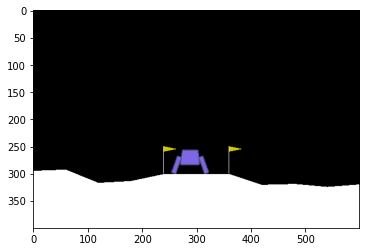

In [13]:
policy_gradient_agent = PolicyGradientAgent()
train_and_evaluate(policy_gradient_agent, use_pretrained=True, save_weights=False)

Average return of 243.61 over 6 evaluation episodes


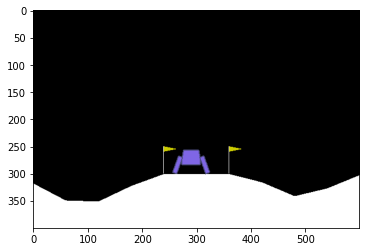

In [12]:
q_learning_agent = QLearningAgent()
train_and_evaluate(q_learning_agent, use_pretrained=True, save_weights=False)